In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
from hyper_params import HyperParams
params = HyperParams()

#### Import Data

In [3]:
# Load data
# fulldata = np.load('data/fulldata.npy')
# fulldata = np.load('data/np_autoencoded_labeled_data.npy')
fulldata = np.load('data/np_autoencoded_multi_labeled_data.npy')
fulldata.shape

(10432, 137)

In [4]:
np.mean(fulldata[:,-1])

0.040548313

## Train an MLP on the Data

In [11]:
# import needel libraries
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(fulldata[:,:-1], fulldata[:,-1], test_size=params.test_set_fraction)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=params.validation_set_fraction / (params.validation_set_fraction + params.train_set_fraction))

In [13]:
# convert the NumPy arrays into Pytorch tensors
x_train = torch.from_numpy(x_train).type(torch.float)
x_val = torch.from_numpy(x_val).type(torch.float)
x_test = torch.from_numpy(x_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_val = torch.from_numpy(y_val).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [14]:
# Create datasets from the tensors
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

In [15]:
x_train.shape[1]

128

In [16]:
num_features = x_train.shape[1]
x_train.shape, f"d = {num_features}"

(torch.Size([3267, 128]), 'd = 128')

In [15]:
# set batch size and create data loaders
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [16]:
# create MLP model class with 2 hidden layers, relu activation, and sigmoid output activation
class MLP(nn.Module):
    def __init__(self, nodes, p):
        super(MLP, self).__init__()
        self.nodes = nodes
        self.p = p
        if len(self.nodes) == 2:
            self.fc1 = nn.Linear(num_features, self.nodes[0])
            self.act1 = nn.ReLU(),
            self.dropout1 = nn.Dropout(p = self.p)
            self.fc2 = nn.Linear(self.nodes[0], self.nodes[1])
            self.act2 = nn.ReLU(),
            self.fc3 = nn.Linear(self.nodes[1], 1)
            self.act3 = nn.ReLU(),
        elif len(self.nodes) == 4:
            self.fc1 = nn.Linear(num_features, self.nodes[0])
            self.dropout1 = nn.Dropout(p = self.p)
            self.bn1 = nn.BatchNorm1d(self.nodes[0])
            self.fc2 = nn.Linear(self.nodes[0], self.nodes[1])
            self.dropout2 = nn.Dropout(p = self.p)
            self.bn2 = nn.BatchNorm1d(self.nodes[1])
            self.fc3 = nn.Linear(self.nodes[1], self.nodes[2])
            self.dropout3 = nn.Dropout(p = self.p)
            self.bn3 = nn.BatchNorm1d(self.nodes[2])
            self.fc4 = nn.Linear(self.nodes[2], self.nodes[3])
            self.dropout4 = nn.Dropout(p = self.p)
            self.bn4 = nn.BatchNorm1d(self.nodes[3])
            self.fc5 = nn.Linear(self.nodes[3], 1)
        elif len(self.nodes) == 6:
            self.fc1 = nn.Linear(num_features, self.nodes[0])
            self.dropout1 = nn.Dropout(p = self.p)
            self.bn1 = nn.BatchNorm1d(self.nodes[0])
            self.fc2 = nn.Linear(self.nodes[0], self.nodes[1])
            self.dropout2 = nn.Dropout(p = self.p)
            self.bn2 = nn.BatchNorm1d(self.nodes[1])
            self.fc3 = nn.Linear(self.nodes[1], self.nodes[2])
            self.dropout3 = nn.Dropout(p = self.p)
            self.bn3 = nn.BatchNorm1d(self.nodes[2])
            self.fc4 = nn.Linear(self.nodes[2], self.nodes[3])
            self.dropout4 = nn.Dropout(p = self.p)
            self.bn4 = nn.BatchNorm1d(self.nodes[3])
            self.fc5 = nn.Linear(self.nodes[3], self.nodes[4])
            self.dropout5 = nn.Dropout(p = self.p)
            self.bn5 = nn.BatchNorm1d(self.nodes[4])
            self.fc6 = nn.Linear(self.nodes[4], self.nodes[5])
            self.dropout6 = nn.Dropout(p = self.p)
            self.bn6 = nn.BatchNorm1d(self.nodes[5])
            self.fc7 = nn.Linear(self.nodes[5], 1)
        else:
            raise

    def forward(self, x):
        if len(self.nodes) == 2:
            x = self.fc1(x)
            x = self.act1(x)
            x = self.dropout1(x)
            #x = self.bn1(x)
            x = self.fc2(x)
            x = self.act2(x)
            #x = self.bn2(x)
            x = self.fc3(x)
            x = self.act3(3)
            return x
        elif len(self.nodes) == 4:
            x = self.fc1(x)
            x = self.dropout1(x)
            x = nn.functional.elu(x)
            x = self.bn1(x)
            x = self.fc2(x)
            x = nn.functional.elu(x)
            x = self.bn2(x)            
            x = self.fc3(x)
            x = self.dropout3(x)
            x = nn.functional.elu(x)
            x = self.fc4(x)
            x = nn.functional.elu(x)
            x = self.bn4(x)
            x = self.fc5(x)
            x = nn.functional.elu(x)
            return x
        elif len(self.nodes) == 6:
            x = self.fc1(x)
            x = self.dropout1(x)
            x = nn.functional.elu(x)
            x = self.bn1(x)
            x = self.fc2(x)
            x = self.dropout2(x)
            x = nn.functional.elu(x)
            x = self.bn2(x)
            x = self.fc3(x)
            x = self.dropout3(x)
            x = nn.functional.elu(x)
            x = self.bn3(x)
            x = self.fc4(x)
            x = self.dropout4(x)
            x = nn.functional.elu(x)
            x = self.bn4(x)
            x = self.fc5(x)
            x = self.dropout5(x)
            x = nn.functional.elu(x)
            x = self.bn5(x)
            x = self.fc6(x)
            x = self.dropout6(x)
            x = nn.functional.elu(x)
            x = self.bn6(x)
            return self.fc7(x)
        else:
            raise

In [17]:
from tqdm import tqdm
# create a training function that will output the model and its metrics for given nodes
def train(n_epochs, nodes, p):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = MLP(nodes, p).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
#     learning_rate=0.01
#     optimizer = torch.optim.Adam(model.parameters(),
#                                  lr=learning_rate, 
#                                  weight_decay=1e-5)
    train_loss = []
    val_loss = []
    for epoch in tqdm(range(n_epochs)):
        train_loss_epoch = 0
        val_loss_epoch = 0
        model.train()
        for data in train_loader:
            x, y = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            y_hat = model(x)
            y_hat = y_hat.view(y_hat.shape[0])
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss_epoch += loss.item()
        model.eval()
        for data in val_loader:
            x, y = data[0].to(device), data[1].to(device)
            y_hat = model(x)
            y_hat = y_hat.view(y_hat.shape[0])
            loss = criterion(y_hat, y)
            val_loss_epoch += loss.item()
        train_loss.append(train_loss_epoch / len(train_loader))
        val_loss.append(val_loss_epoch / len(val_loader))
            
    return model, train_loss, val_loss

In [209]:
nodes_list = [[[676, 338],[338, 169],[224, 112],[128, 64],[64, 32]],
              [[676, 338, 169, 84],[338, 169, 84, 42],[169, 84, 42, 24],[84, 42, 24, 12],[42, 24, 12, 6]],
              [[1352, 676, 338, 169, 84, 42],[676, 338, 169, 84, 42, 24],[338, 169, 84, 42, 24, 12],[169, 84, 42, 24, 12, 6],[84, 42, 24, 12, 6, 3]]]

100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


With nodes [676, 338] and p = 0:



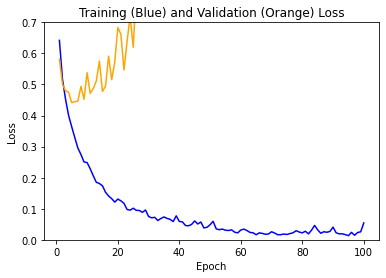

100%|██████████| 100/100 [00:19<00:00,  5.22it/s]


With nodes [676, 338] and p = 0.1:



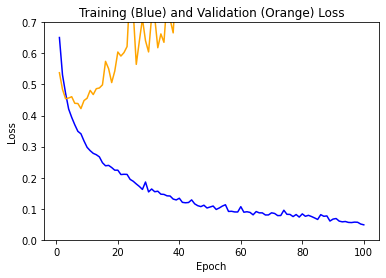

100%|██████████| 100/100 [00:18<00:00,  5.27it/s]


With nodes [676, 338] and p = 0.25:



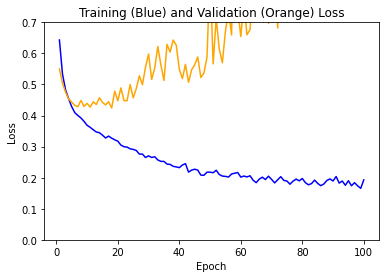

100%|██████████| 100/100 [00:19<00:00,  5.24it/s]


With nodes [676, 338] and p = 0.4:



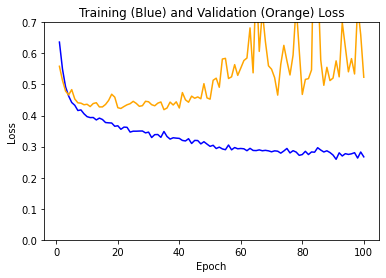

100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


With nodes [676, 338] and p = 0.5:



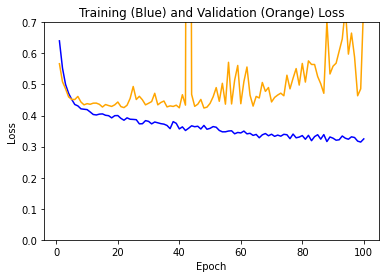

100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


With nodes [338, 169] and p = 0:



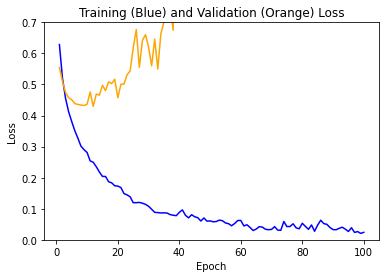

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


With nodes [338, 169] and p = 0.1:



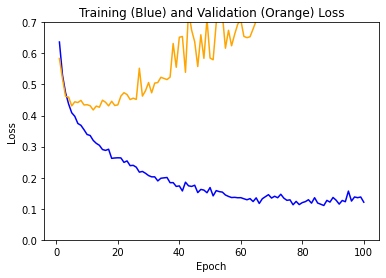

100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


With nodes [338, 169] and p = 0.25:



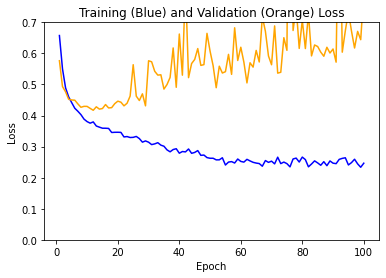

100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


With nodes [338, 169] and p = 0.4:



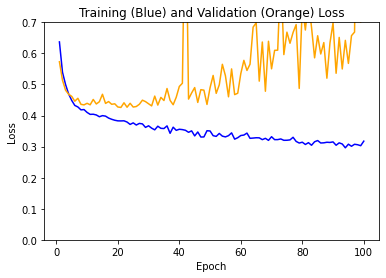

100%|██████████| 100/100 [00:19<00:00,  5.17it/s]


With nodes [338, 169] and p = 0.5:



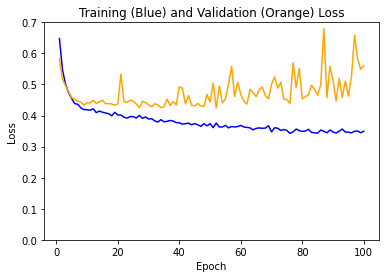

100%|██████████| 100/100 [00:18<00:00,  5.43it/s]


With nodes [224, 112] and p = 0:



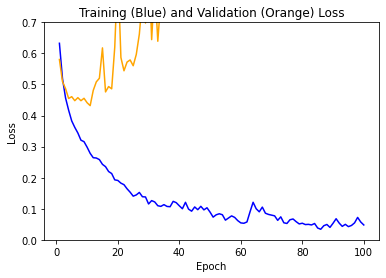

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


With nodes [224, 112] and p = 0.1:



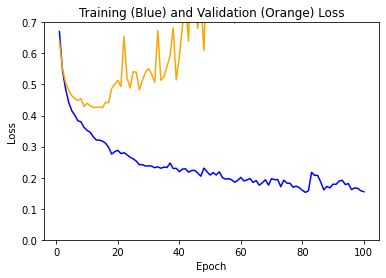

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


With nodes [224, 112] and p = 0.25:



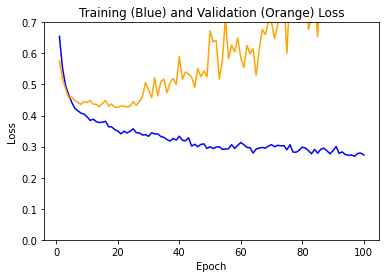

100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


With nodes [224, 112] and p = 0.4:



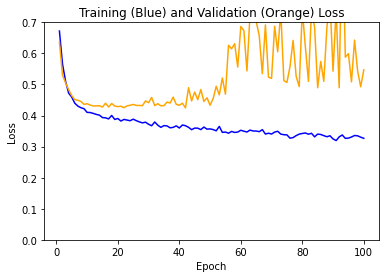

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


With nodes [224, 112] and p = 0.5:



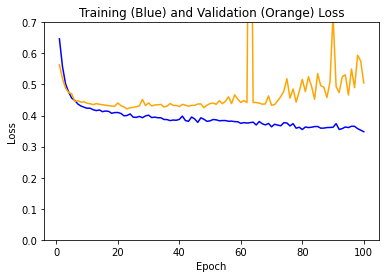

100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


With nodes [128, 64] and p = 0:



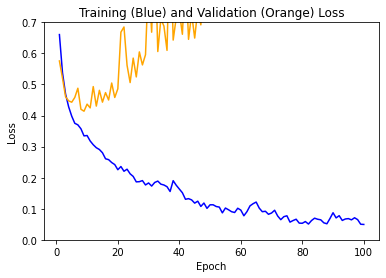

100%|██████████| 100/100 [00:19<00:00,  5.24it/s]


With nodes [128, 64] and p = 0.1:



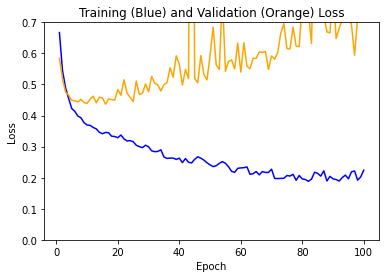

100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


With nodes [128, 64] and p = 0.25:



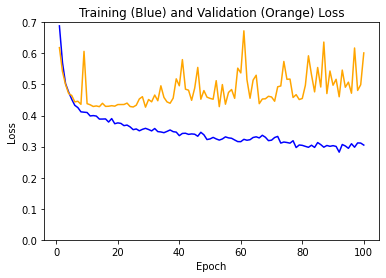

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


With nodes [128, 64] and p = 0.4:



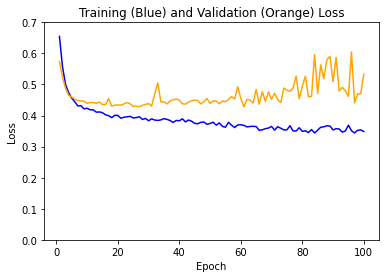

100%|██████████| 100/100 [00:19<00:00,  5.21it/s]


With nodes [128, 64] and p = 0.5:



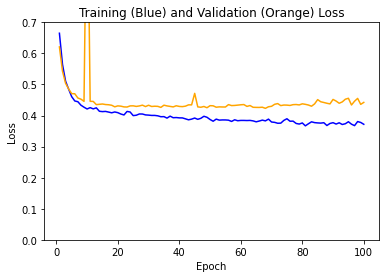

100%|██████████| 100/100 [00:18<00:00,  5.46it/s]


With nodes [64, 32] and p = 0:



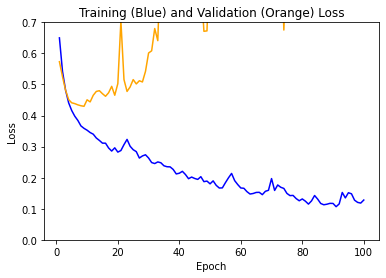

100%|██████████| 100/100 [00:19<00:00,  5.19it/s]


With nodes [64, 32] and p = 0.1:



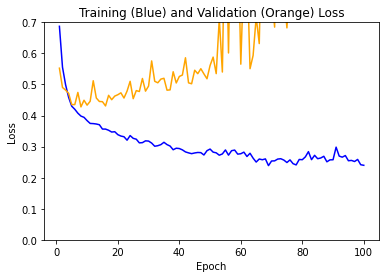

100%|██████████| 100/100 [00:19<00:00,  5.20it/s]

With nodes [64, 32] and p = 0.25:



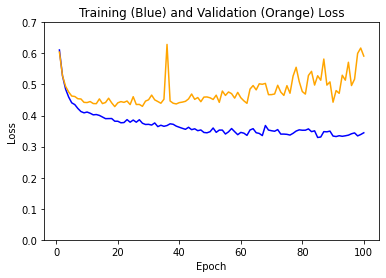

100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


With nodes [64, 32] and p = 0.4:



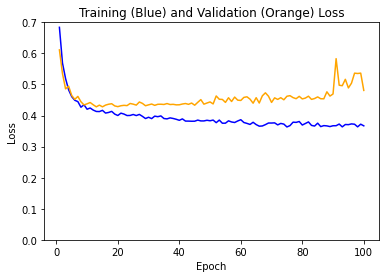

100%|██████████| 100/100 [00:19<00:00,  5.22it/s]


With nodes [64, 32] and p = 0.5:



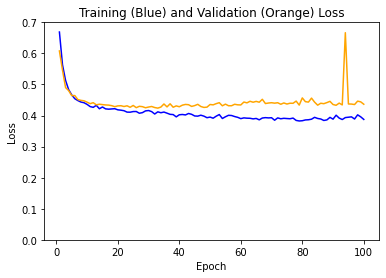

100%|██████████| 100/100 [00:26<00:00,  3.79it/s]

With nodes [676, 338, 169, 84] and p = 0:



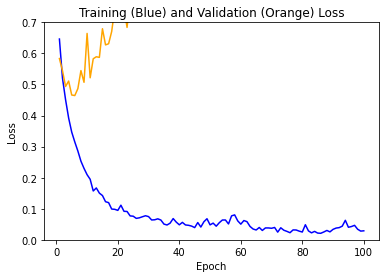

100%|██████████| 100/100 [00:27<00:00,  3.57it/s]

With nodes [676, 338, 169, 84] and p = 0.1:



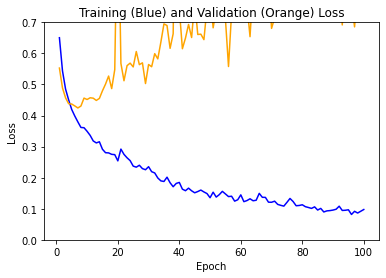

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

With nodes [676, 338, 169, 84] and p = 0.25:



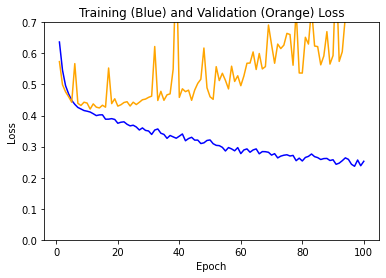

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

With nodes [676, 338, 169, 84] and p = 0.4:



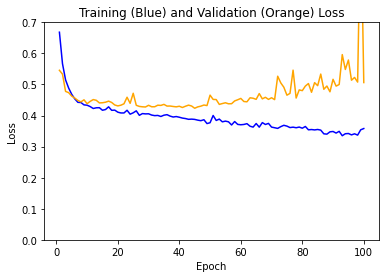

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

With nodes [676, 338, 169, 84] and p = 0.5:



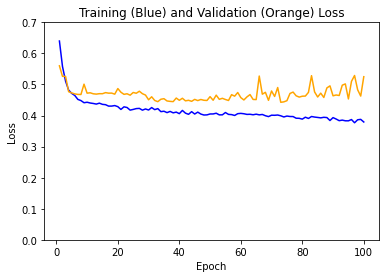

100%|██████████| 100/100 [00:26<00:00,  3.79it/s]

With nodes [338, 169, 84, 42] and p = 0:



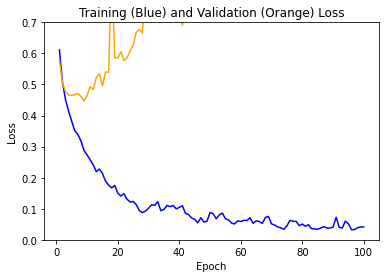

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [338, 169, 84, 42] and p = 0.1:



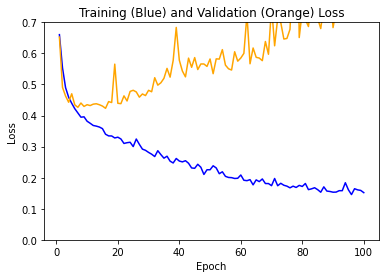

100%|██████████| 100/100 [00:27<00:00,  3.59it/s]

With nodes [338, 169, 84, 42] and p = 0.25:



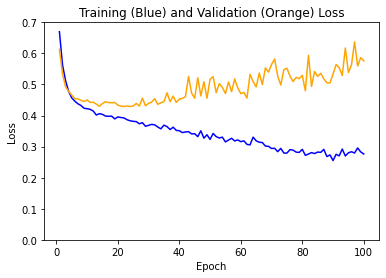

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [338, 169, 84, 42] and p = 0.4:



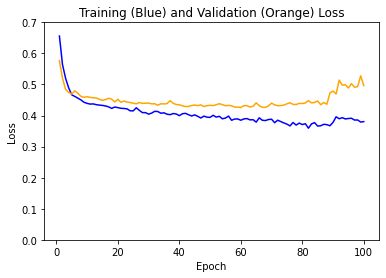

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

With nodes [338, 169, 84, 42] and p = 0.5:



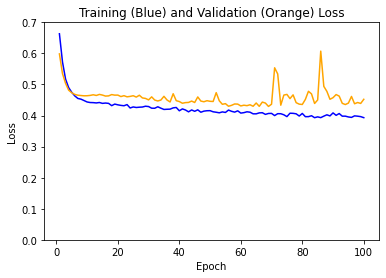

100%|██████████| 100/100 [00:26<00:00,  3.82it/s]

With nodes [169, 84, 42, 24] and p = 0:



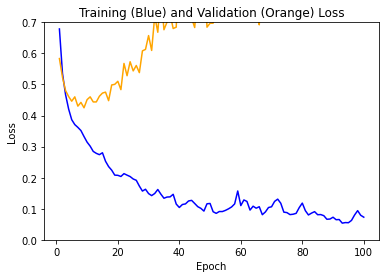

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]

With nodes [169, 84, 42, 24] and p = 0.1:



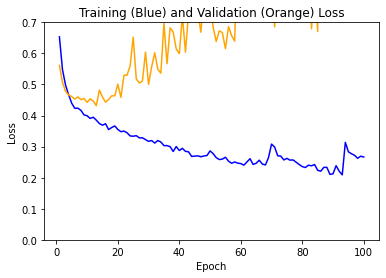

100%|██████████| 100/100 [00:27<00:00,  3.59it/s]

With nodes [169, 84, 42, 24] and p = 0.25:



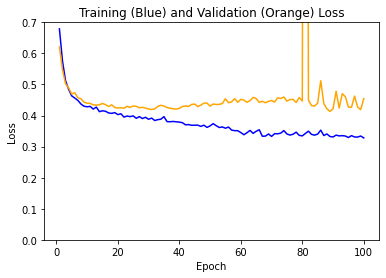

100%|██████████| 100/100 [00:27<00:00,  3.58it/s]

With nodes [169, 84, 42, 24] and p = 0.4:



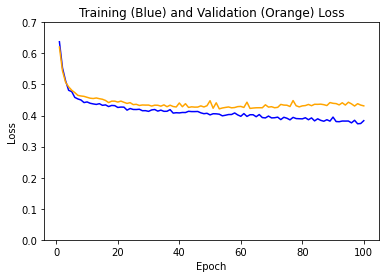

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [169, 84, 42, 24] and p = 0.5:



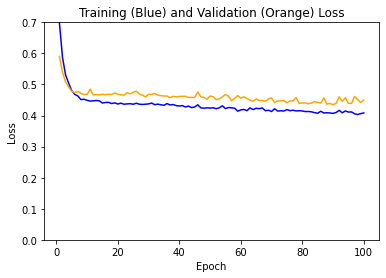

100%|██████████| 100/100 [00:26<00:00,  3.83it/s]

With nodes [84, 42, 24, 12] and p = 0:



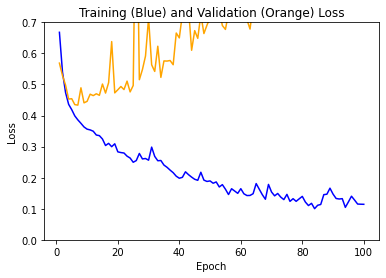

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [84, 42, 24, 12] and p = 0.1:



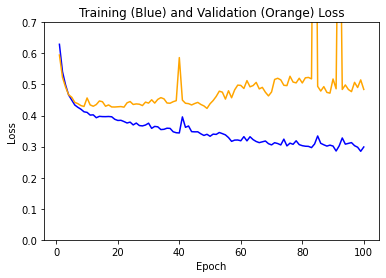

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [84, 42, 24, 12] and p = 0.25:



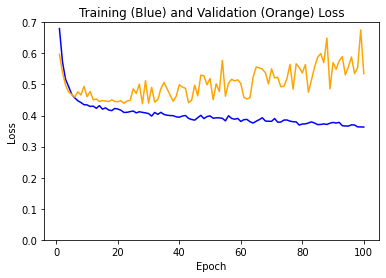

100%|██████████| 100/100 [00:28<00:00,  3.55it/s]

With nodes [84, 42, 24, 12] and p = 0.4:



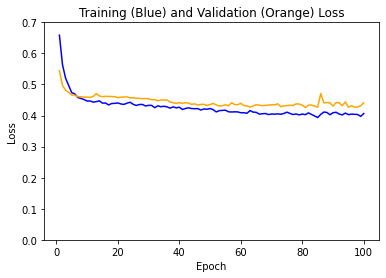

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [84, 42, 24, 12] and p = 0.5:



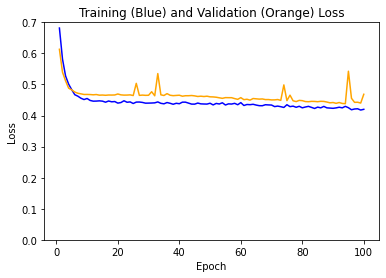

100%|██████████| 100/100 [00:25<00:00,  3.86it/s]

With nodes [42, 24, 12, 6] and p = 0:



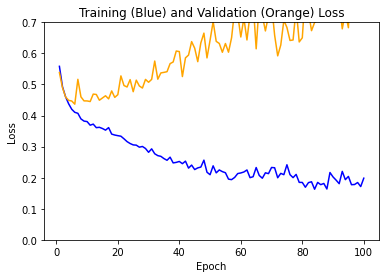

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [42, 24, 12, 6] and p = 0.1:



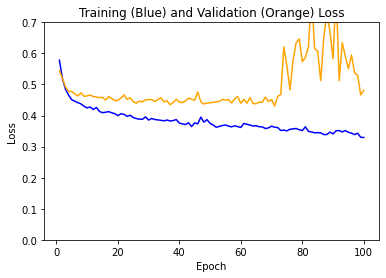

100%|██████████| 100/100 [00:27<00:00,  3.63it/s]

With nodes [42, 24, 12, 6] and p = 0.25:



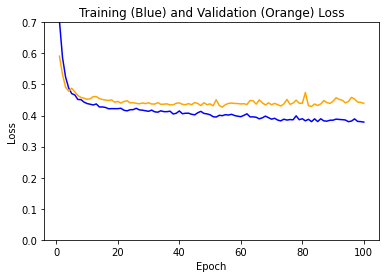

100%|██████████| 100/100 [00:27<00:00,  3.61it/s]

With nodes [42, 24, 12, 6] and p = 0.4:



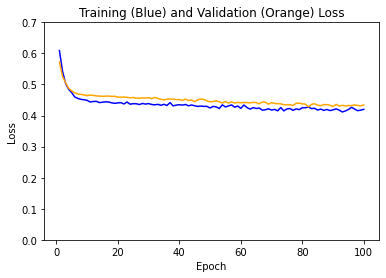

100%|██████████| 100/100 [00:28<00:00,  3.55it/s]

With nodes [42, 24, 12, 6] and p = 0.5:



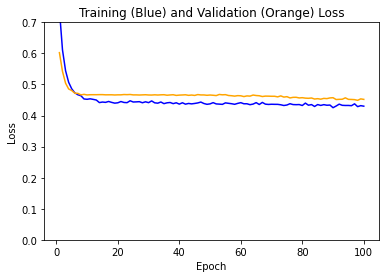

100%|██████████| 100/100 [00:34<00:00,  2.89it/s]

With nodes [1352, 676, 338, 169, 84, 42] and p = 0:



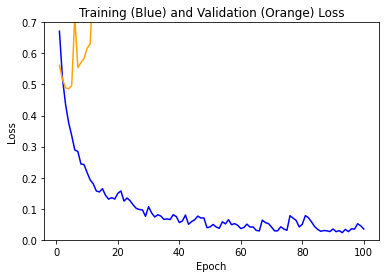

100%|██████████| 100/100 [00:36<00:00,  2.70it/s]

With nodes [1352, 676, 338, 169, 84, 42] and p = 0.1:



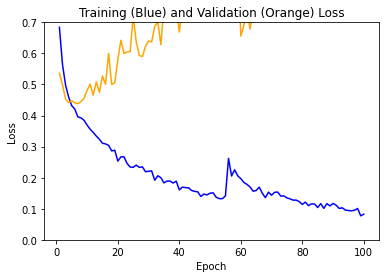

100%|██████████| 100/100 [00:36<00:00,  2.71it/s]

With nodes [1352, 676, 338, 169, 84, 42] and p = 0.25:



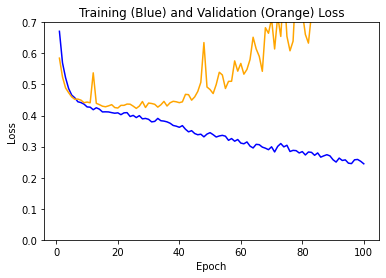

100%|██████████| 100/100 [00:36<00:00,  2.71it/s]

With nodes [1352, 676, 338, 169, 84, 42] and p = 0.4:



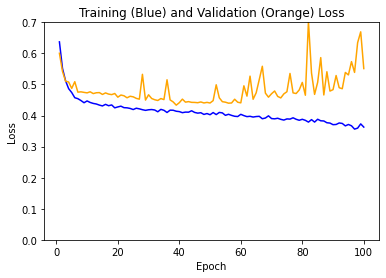

100%|██████████| 100/100 [00:37<00:00,  2.68it/s]

With nodes [1352, 676, 338, 169, 84, 42] and p = 0.5:



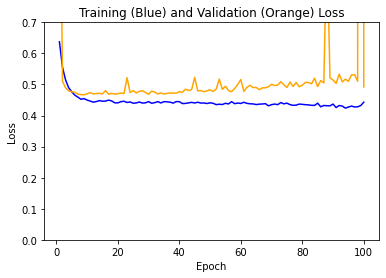

100%|██████████| 100/100 [00:34<00:00,  2.93it/s]

With nodes [676, 338, 169, 84, 42, 24] and p = 0:



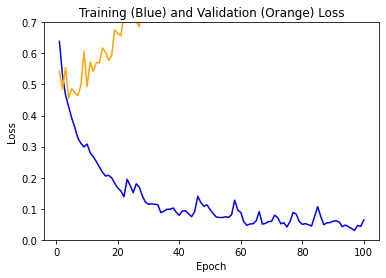

100%|██████████| 100/100 [00:36<00:00,  2.74it/s]

With nodes [676, 338, 169, 84, 42, 24] and p = 0.1:



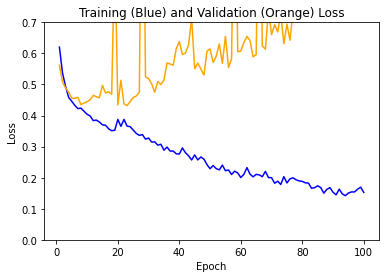

100%|██████████| 100/100 [00:36<00:00,  2.73it/s]

With nodes [676, 338, 169, 84, 42, 24] and p = 0.25:



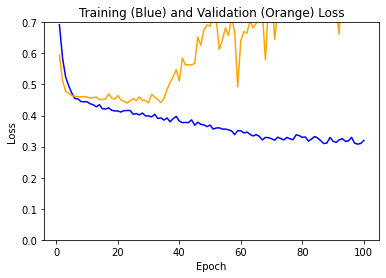

100%|██████████| 100/100 [00:36<00:00,  2.73it/s]

With nodes [676, 338, 169, 84, 42, 24] and p = 0.4:



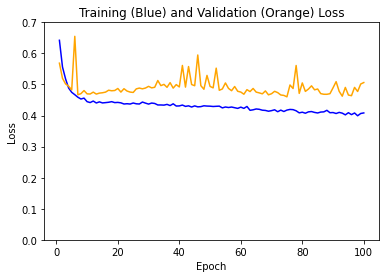

100%|██████████| 100/100 [00:36<00:00,  2.72it/s]

With nodes [676, 338, 169, 84, 42, 24] and p = 0.5:



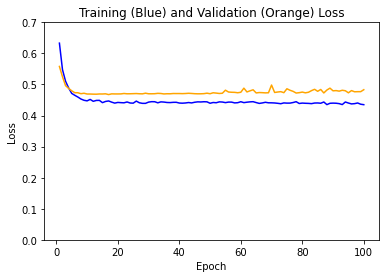

100%|██████████| 100/100 [00:33<00:00,  2.95it/s]

With nodes [338, 169, 84, 42, 24, 12] and p = 0:



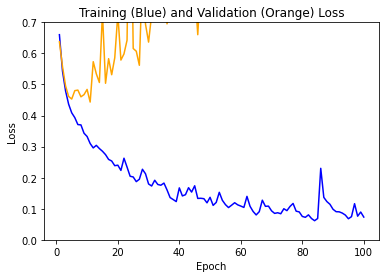

100%|██████████| 100/100 [00:36<00:00,  2.73it/s]

With nodes [338, 169, 84, 42, 24, 12] and p = 0.1:



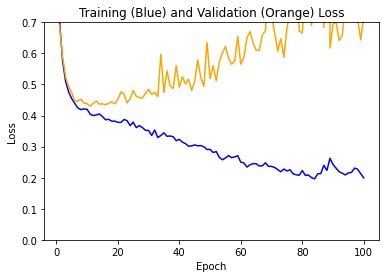

100%|██████████| 100/100 [00:36<00:00,  2.74it/s]

With nodes [338, 169, 84, 42, 24, 12] and p = 0.25:



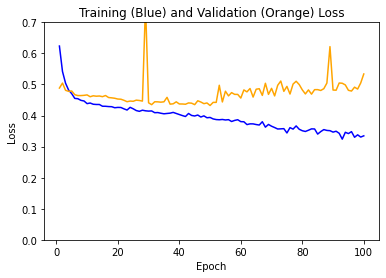

100%|██████████| 100/100 [00:36<00:00,  2.74it/s]

With nodes [338, 169, 84, 42, 24, 12] and p = 0.4:



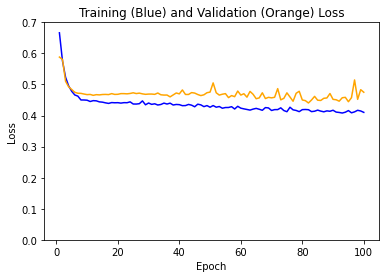

100%|██████████| 100/100 [00:36<00:00,  2.72it/s]

With nodes [338, 169, 84, 42, 24, 12] and p = 0.5:



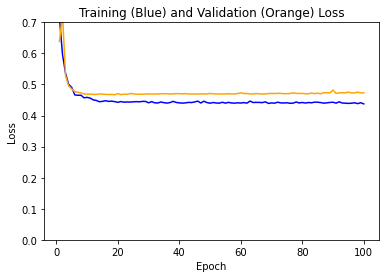

100%|██████████| 100/100 [00:33<00:00,  2.97it/s]

With nodes [169, 84, 42, 24, 12, 6] and p = 0:



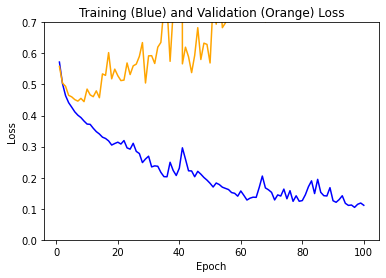

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]

With nodes [169, 84, 42, 24, 12, 6] and p = 0.1:



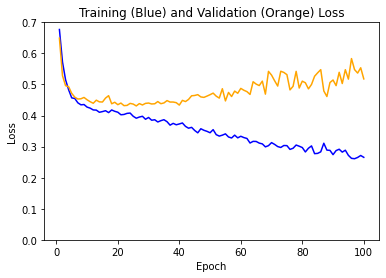

100%|██████████| 100/100 [00:36<00:00,  2.77it/s]

With nodes [169, 84, 42, 24, 12, 6] and p = 0.25:



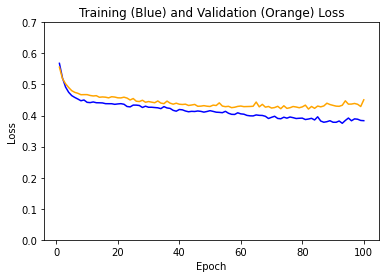

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]

With nodes [169, 84, 42, 24, 12, 6] and p = 0.4:



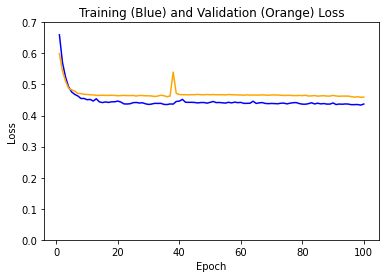

100%|██████████| 100/100 [00:36<00:00,  2.74it/s]

With nodes [169, 84, 42, 24, 12, 6] and p = 0.5:



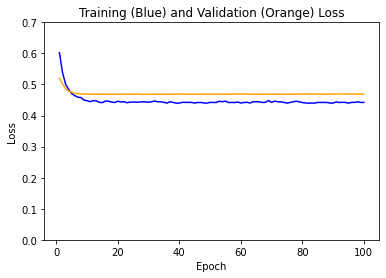

100%|██████████| 100/100 [00:33<00:00,  2.95it/s]

With nodes [84, 42, 24, 12, 6, 3] and p = 0:



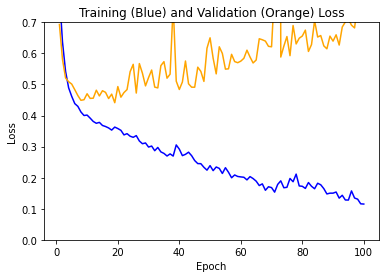

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]

With nodes [84, 42, 24, 12, 6, 3] and p = 0.1:



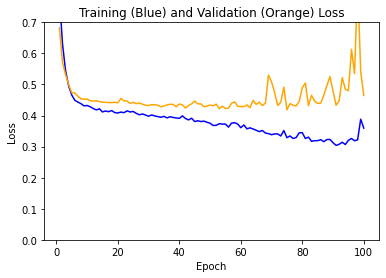

100%|██████████| 100/100 [00:36<00:00,  2.75it/s]

With nodes [84, 42, 24, 12, 6, 3] and p = 0.25:



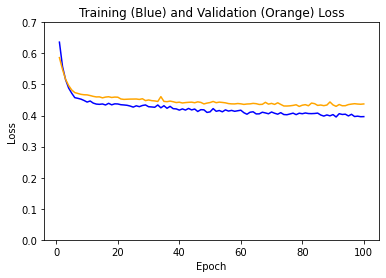

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]

With nodes [84, 42, 24, 12, 6, 3] and p = 0.4:



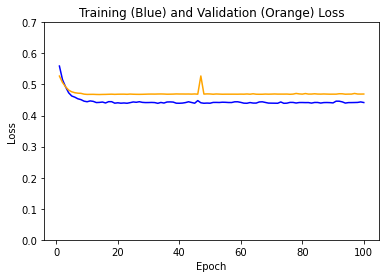

100%|██████████| 100/100 [00:36<00:00,  2.72it/s]

With nodes [84, 42, 24, 12, 6, 3] and p = 0.5:



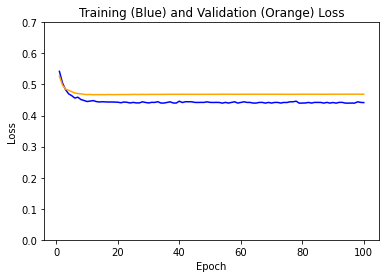

In [39]:
# with Relu
n_epochs = 100
for i in range(3):
    for nodes in nodes_list[i]:
        for p in [0, 0.1, 0.25, 0.4, 0.5]:
            model, train_loss, val_loss = train(n_epochs, nodes, p)
            print("With nodes {} and p = {}:\n".format(nodes, p))
            plt.plot(list(range(1, n_epochs+1)), train_loss, color='blue')
            plt.plot(list(range(1, n_epochs+1)), val_loss, color='orange')
            plt.ylim((0, 0.7))
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Training (Blue) and Validation (Orange) Loss')
            plt.show()

In [ ]:
# with elu
n_epochs = 100
for i in range(3):
    for nodes in nodes_list[i]:
        model, train_loss, val_loss = train(n_epochs, nodes, p = 0.5)
        print("With nodes {} and p = {}:\n".format(nodes, p))
        plt.plot(list(range(1, n_epochs+1)), train_loss, color='blue')
        plt.plot(list(range(1, n_epochs+1)), val_loss, color='orange')
        plt.ylim((0, 0.7))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training (Blue) and Validation (Orange) Loss')
        plt.show()

In [31]:
epochs = 100
# nodes = [84, 42, 24, 12, 6, 3]
nodes = [128, 128, 64, 32]
model, train_loss, val_loss = train(epochs, nodes, p = 0.2)

100%|██████████| 100/100 [00:12<00:00,  8.16it/s]


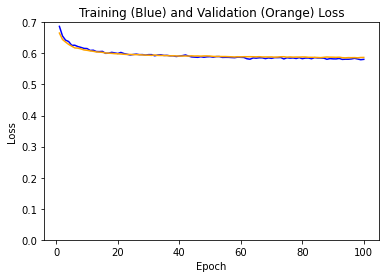

In [32]:
plt.plot(list(range(1, epochs+1)), train_loss, color='blue')
plt.plot(list(range(1, epochs+1)), val_loss, color='orange')
plt.ylim((0.0, 0.7))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training (Blue) and Validation (Orange) Loss')
plt.show()

In [33]:
print(model)

MLP(
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (bn4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
)


In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def classify(model, loader):
    model.eval()
    y_true = torch.LongTensor()
    y_pred = torch.LongTensor()
    for data in loader:
        x, y = data[0].to(device), data[1].to(device)
        y_hat = model(x)
        y_hat = torch.sigmoid(y_hat)
        y_hat = y_hat.view(y_hat.shape[0]) # convert shape from [batch size, 1] to [batch size]
        y_hat = torch.where(y_hat >= 0.5, torch.ones_like(y_hat), torch.zeros_like(y_hat))
        y_true = torch.cat((y_true, y.to('cpu').long()), dim=0)
        y_pred = torch.cat((y_pred,  y_hat.to('cpu').long()), dim=0)
    return y_true, y_pred

def predict(model, loader):
    model.eval()
    y_true = torch.FloatTensor()
    y_pred = torch.FloatTensor()
    for data in loader:
        x, y = data[0].to(device), data[1].to(device)
        y_hat = model(x)
        y_hat = torch.sigmoid(y_hat)
        y_hat = y_hat.view(y_hat.shape[0]) # convert shape from [batch size, 1] to [batch size]
        y_true = torch.cat((y_true, y.to('cpu').float()), dim=0)
        y_pred = torch.cat((y_pred,  y_hat.to('cpu').float()), dim=0)
    return y_true, y_pred

              precision    recall  f1-score   support

           0     0.7434    0.8979    0.8134       284
           1     0.5606    0.2960    0.3874       125

    accuracy                         0.7139       409
   macro avg     0.6520    0.5969    0.6004       409
weighted avg     0.6876    0.7139    0.6832       409


TN: 255 FP: 29 FN: 88 TP: 37

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.697


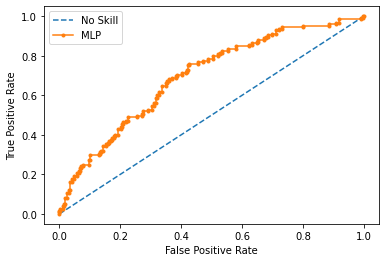


MLP: f1=0.387 auc=0.489


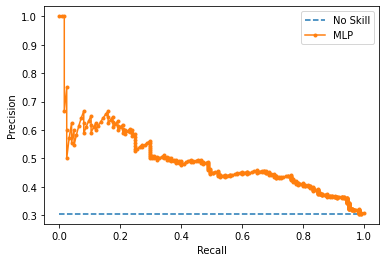

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediction
y_true, y_pred = classify(model, test_loader)

# Classification report (recall, preccision, f-score, accuracy)
print(classification_report(y_true, y_pred, digits=4))
print()
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
print('TN:',tn, 'FP:',fp, 'FN:',fn, 'TP:',tp )

# Tania's code modified for the PyTorch model
# ROC_AUC curve
def plt_roc_auc_curve(model, loader, model_name):
    # predict probabilities
    y_test, model_probs = predict(model, loader)
    # convert from Torch to Numpy
    y_test, model_probs = y_test.detach().numpy(), model_probs.detach().numpy()
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name + ': ROC AUC=%.3f' % (model_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
def plt_precision_recall_curve(model, loader, model_name):
    # predict probabilities
    y_test, model_probs = predict(model, loader)
    # convert from Torch to Numpy
    y_test, model_probs = y_test.detach().numpy(), model_probs.detach().numpy()
    # predict class values
    _, y_pred = classify(model, test_loader)
    # convert from Torch to Numpy
    y_pred = y_pred.detach().numpy()
    model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)
    model_f1, model_auc = f1_score(y_test, y_pred), auc(model_recall, model_precision)
    # summarize scores
    print(model_name + ': f1=%.3f auc=%.3f' % (model_f1, model_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(model_recall, model_precision, marker='.', label=model_name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

# ROC_AUC curve
print()
plt_roc_auc_curve(model, test_loader, model_name='MLP')
# Precision_Recall curve
print()
plt_precision_recall_curve(model, test_loader, model_name='MLP')